In [1]:
import pandas as    pd
import seaborn as   sns
import matplotlib.pyplot as plt

/tmp/ipykernel_9543/937586957.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as    pd
/home/zea/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [7]:
df = pd.read_csv('./res.csv')
for i in [2,4,6,8,16,20,32,40]:
    df[f"S{i}"] = df['T1'] / df[f"T{i}"]
df

,size,T1,T2,S2,T4,S4,T6,S6,T8,S8,T16,S16,T20,S20,T32,S32,T40,S40
0,20000,2,1,2.0,0.52,3.846154,0.3500,5.714286,0.2648,7.552870,0.1512,13.227513,0.2620,7.633588,0.1470,13.605442,0.0700,28.571429
1,40000,8,4,2.0,2.00,4.000000,1.3743,5.821145,1.0500,7.619048,0.5800,13.793103,0.8614,9.287207,0.4746,16.856300,0.2479,32.271077


In [8]:
df_20000 = pd.DataFrame(columns=["S", "T num"])
df_40000 = pd.DataFrame(columns=["S", "T num"])
for i in [2, 4, 6, 8, 16, 20, 32, 40]:
    df_20000.loc[len(df_20000)] = [df.loc[0, f"S{i}"], int(i)]
    df_40000.loc[len(df_40000)] = [df.loc[1, f"S{i}"], int(i)]
df_20000["T num"] = df_20000["T num"].astype(int)
df_40000["T num"] = df_20000["T num"].astype(int)
df_40000

,S,T num
0,2.000000,2
1,4.000000,4
2,5.821145,6
3,7.619048,8
4,13.793103,16
5,9.287207,20
6,16.856300,32
7,32.271077,40


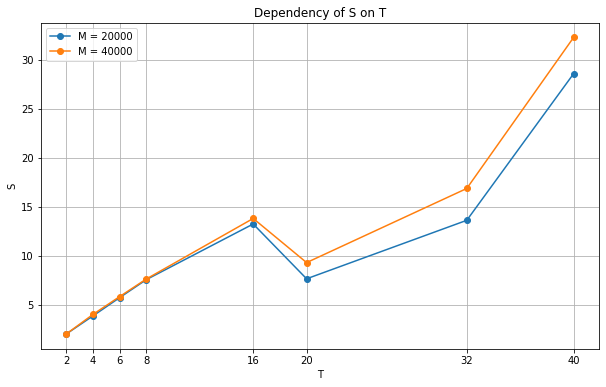

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df_20000["T num"], df_20000["S"], marker='o', label='M = 20000')
plt.plot(df_40000["T num"], df_40000["S"], marker='o', label='M = 40000')

plt.xlabel('T')
plt.ylabel('S')
plt.title('Dependency of S on T')
plt.legend()
plt.xticks(df_20000["T num"])
plt.grid(True)
plt.savefig("plot.png")
plt.show()
